In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#### Make sure the players data is updated from Understat

data = pd.read_csv('Players_data_stats.csv')
data.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,8260,Erling Haaland,16,1324,21,15.813955,3,3.719011,65,16,3,0,F S,Manchester City,18,13.530448,15.309691,0.955593
1,647,Harry Kane,18,1614,15,11.978790,1,3.968278,67,31,4,0,F,Tottenham,13,9.695287,11.282306,1.823113
2,998,Ivan Toney,16,1440,12,13.103710,3,2.592261,47,16,6,0,F,Brentford,9,10.820209,11.378092,2.378428
3,773,Aleksandar Mitrovic,15,1289,11,10.711971,1,2.143341,69,12,5,0,F,Fulham,8,6.906125,9.421914,2.204721
4,2381,Rodrigo,16,1158,10,6.685382,1,1.806797,46,11,2,0,F M S,Leeds,9,5.924213,6.834499,1.127569


In [3]:
print (data.shape)

(483, 18)


In [4]:
data.describe()

,id,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,5707.316770,10.892340,724.834369,0.991718,1.067236,0.689441,0.760845,9.171843,6.863354,1.316770,0.031056,0.919255,0.994744,3.044091,1.833986
std,3705.873451,5.724375,537.435915,2.051195,1.846578,1.221706,1.073724,11.529210,8.713154,1.495869,0.173649,1.854596,1.661175,3.071894,1.895639
min,76.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1659.500000,6.000000,194.500000,0.000000,0.043131,0.000000,0.019393,1.000000,1.000000,0.000000,0.000000,0.000000,0.043131,0.665918,0.391376
50%,6485.000000,12.000000,720.000000,0.000000,0.369748,0.000000,0.322161,5.000000,4.000000,1.000000,0.000000,0.000000,0.369171,2.328792,1.254748
75%,8833.000000,16.000000,1221.500000,1.000000,1.231670,1.000000,1.094098,13.000000,10.500000,2.000000,0.000000,1.000000,1.187159,4.502730,2.789917
max,11284.000000,19.000000,1709.000000,21.000000,15.813955,9.000000,8.988285,69.000000,58.000000,7.000000,1.000000,18.000000,13.530448,17.652296,13.095030


In [5]:
data['time'].quantile(0.5)

720.0

Filtering out those instances where player played less than 350 minutes

In [6]:
data = data[data['time']>350]
data.shape

(322, 18)

In [7]:
data['team_title'].value_counts()

Manchester United                            19
Chelsea                                      18
Brentford                                    18
Nottingham Forest                            18
Southampton                                  17
Wolverhampton Wanderers                      17
Tottenham                                    17
Liverpool                                    16
Leicester                                    16
Bournemouth                                  16
Manchester City                              15
West Ham                                     15
Everton                                      15
Aston Villa                                  15
Newcastle United                             15
Leeds                                        15
Fulham                                       15
Brighton                                     14
Arsenal                                      14
Crystal Palace                               13
Nottingham Forest,Wolverhampton Wanderer

In [8]:
data[data["team_title"]=="Nottingham Forest,Wolverhampton Wanderers"]

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
96,6857,Morgan Gibbs-White,17,1386,2,3.172066,2,2.459847,28,25,2,0,F M S,"Nottingham Forest,Wolverhampton Wanderers",2,3.172066,6.145872,1.884339


In [9]:
data['position'].value_counts()

D S        73
M S        58
D          38
F M S      36
F S        28
GK         20
M          19
D M S      17
F M        10
D M         7
F           6
D F M S     4
D F M       3
GK S        2
D F S       1
Name: position, dtype: int64

In [10]:
def position_map(pos):
    if pos in ['D', 'D S', 'D M']:
        return "DEF"
    elif pos in ['M', 'M S', "F M S", "F M",  'D M S', 'D F M']:
        return "MID"
    elif pos in ['F', "F S"]:
        return "FWD"
    return "GK"

In [11]:
data['POS'] = data['position'].apply(lambda x: position_map(x))

In [12]:
data.columns

Index(['id', 'player_name', 'games', 'time', 'goals', 'xG', 'assists', 'xA',
       'shots', 'key_passes', 'yellow_cards', 'red_cards', 'position',
       'team_title', 'npg', 'npxG', 'xGChain', 'xGBuildup', 'POS'],
      dtype='object')

In [13]:
data['90s'] = data['time']/90

data['goals_90s'] = data.apply(lambda x: x['goals']/x['90s'], axis = 1)
data['xG_90s'] = data.apply(lambda x: x['xG']/x['90s'], axis = 1)
data['assists_90s'] = data.apply(lambda x: x['assists']/x['90s'], axis = 1)
data['xA_90s'] = data.apply(lambda x: x['xA']/x['90s'], axis = 1)
data['shots_90s'] = data.apply(lambda x: x['shots']/x['90s'], axis = 1)
data['key_passes_90s'] = data.apply(lambda x: x['key_passes']/x['90s'], axis = 1)
data['npG_90s'] = data.apply(lambda x: x['npg']/x['90s'], axis = 1)
data['npxG_90s'] = data.apply(lambda x: x['npxG']/x['90s'], axis = 1)

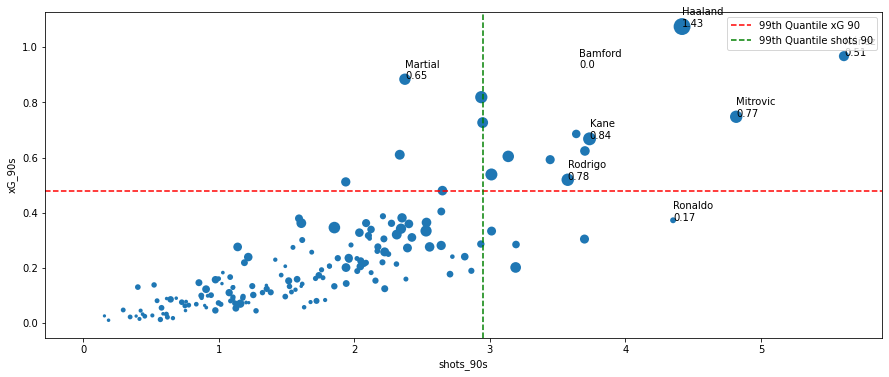

In [15]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(x = 'shots_90s', y = 'xG_90s', s = 200*(data['goals_90s']), data = data)
q = 99
t_y = data['xG_90s'].quantile(q/100)
t_x = data['shots_90s'].quantile(q/100)
t_s = data['goals_90s'].quantile(q/100)

plt.axhline(data['xG_90s'].quantile(0.95), linestyle = '--', color = 'red', label = '{}th Quantile xG 90'.format(q))
plt.axvline(data['shots_90s'].quantile(0.95), linestyle = '--', color = 'green', label = '{}th Quantile shots 90'.format(q))

for idx, row in data.iterrows():
    if (row['xG_90s']>t_y) or (row['shots_90s']>t_x) or (row['goals_90s']>t_s):
        plt.text(row['shots_90s'], row['xG_90s'], s = str(row['player_name'].split()[-1]) + "\n" + str(round(row['goals_90s'],2)))

plt.legend()
plt.savefig('plots/shots_vs_xg90s.png')
plt.show()

In [16]:
data['shots_passes_90s'] = data['shots_90s'] + data['key_passes_90s']
data['xGI_90s'] = data['xG_90s'] + data['xA_90s']
data['contribution_90s'] = data['goals_90s'] + data['assists_90s']

DEF Solly March 3.3061224489795924 0.39935230935106475 0.30612244897959184
DEF Kieran Trippier 3.0223880597014925 0.383431922241267 0.27985074626865675
DEF Trent Alexander-Arnold 3.3962264150943398 0.3625193300200099 0.14150943396226415
MID Rodrigo 4.430051813471502 0.6600138757117284 0.854922279792746
MID Roberto Firmino 4.7518479408658925 0.8105141521404953 0.9503695881731785
MID Mohamed Salah 5.584158415841585 0.8448947971262555 0.6534653465346535
MID Phil Foden 4.608433734939759 0.5861257021708122 0.9939759036144578
MID James Maddison 5.7272727272727275 0.3585546871308576 0.9
MID Kevin De Bruyne 6.555869872701557 0.7615559773132352 0.7637906647807639
MID Kaoru Mitoma 3.3810375670840784 0.7556651157122072 0.6440071556350626
MID Fred 5.625 0.5756895665295555 0.4017857142857143
FWD Erling Haaland 5.506042296072508 1.327769608290309 1.6314199395770395
FWD Harry Kane 5.4646840148698885 0.8892417171637642 0.8921933085501859
FWD Ivan Toney 3.9375 0.9809982117731124 0.9375
FWD Aleksandar M

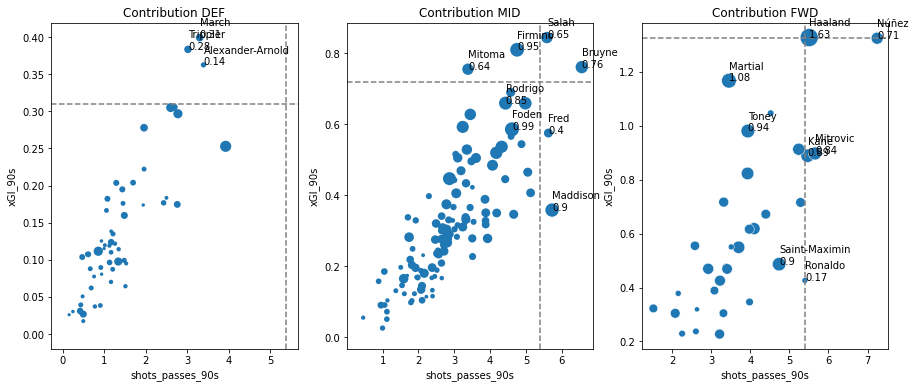

In [21]:
fig,axs = plt.subplots(1, 3, figsize = (15, 6))
q = 97.5
positions = ["DEF", "MID", "FWD"]
for i, pos in enumerate(positions):
    subdata = data[data['POS']==pos]
    sns.scatterplot(x = 'shots_passes_90s', y = 'xGI_90s', s = 200*(subdata['contribution_90s']), data = subdata, ax = axs[i])
    
    t_y = subdata['xGI_90s'].quantile(q/100)
    t_x = data['shots_passes_90s'].quantile(q/100)
    t_s = data['contribution_90s'].quantile(q/100)

    axs[i].axhline(t_y, linestyle = '--', color = 'gray')
    axs[i].axvline(t_x, linestyle = '--', color = 'gray')

    for idx, row in subdata.iterrows():
        if (row['xGI_90s']>t_y) or (row['shots_passes_90s']>t_x) or (row['contribution_90s']>t_s):
            print (pos, row['player_name'], row['shots_passes_90s'], row['xGI_90s'], row['contribution_90s'])
            axs[i].text(row['shots_passes_90s'], row['xGI_90s'], s = str(row['player_name'].split()[-1]) + "\n" + str(round(row['contribution_90s'],2)))

    axs[i].set_title("Contribution {}".format(pos))

plt.savefig('plots/position_wise_contribution.png')
plt.show()

In [22]:
def fpl_score(row):
    
    if row['POS']=='FWD':
        s_expected = row['xG'] * 4
        s_actual = row['goals']* 4
    elif row['POS']=='MID':
        s_expected = row['xG'] * 5
        s_actual = row['goals']* 5
    else:
        s_expected = row['xG'] * 6
        s_actual = row['goals']* 6

    s_expected = s_expected + (row['xA']*3)
    s_actual = s_actual + (row['assists']*3)
    return (s_expected, s_actual)

t1 = []
t2 = []
for idx, row in data.iterrows():
    fpl_perfs = fpl_score(row)
    t1.append(fpl_perfs[0])
    t2.append(fpl_perfs[1])

data['xFPL_attacking_score'] = t1
data['FPL_attacking_score'] = t2


In [23]:
data['xFPL_attacking_score_90s'] = data['xFPL_attacking_score']/data['90s']
data['FPL_attacking_score_90s'] = data['FPL_attacking_score']/data['90s']

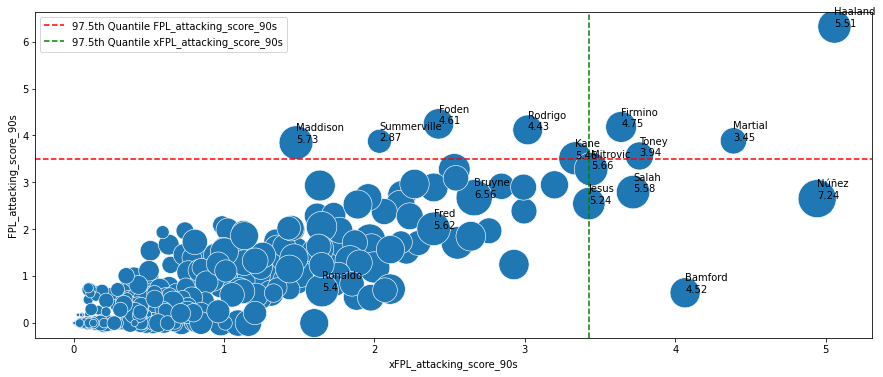

In [26]:
fig = plt.figure(figsize = (15, 6))
x_feature = 'xFPL_attacking_score_90s'
y_feature = 'FPL_attacking_score_90s'
s_feature = 'shots_passes_90s'

sns.scatterplot(x = 'xFPL_attacking_score_90s', y = 'FPL_attacking_score_90s', s = 200*(data['shots_passes_90s']), data = data)
q = 97.5
t_y = data[y_feature].quantile(q/100)
t_x = data[x_feature].quantile(q/100)
t_s = data[s_feature].quantile(q/100)

plt.axhline(data[y_feature].quantile(q/100), linestyle = '--', color = 'red', label = '{}th Quantile {}'.format(q,y_feature))
plt.axvline(data[x_feature].quantile(q/100), linestyle = '--', color = 'green', label = '{}th Quantile {}'.format(q, x_feature))

for idx, row in data.iterrows():
    if (row[y_feature]>t_y) or (row[x_feature]>t_x) or (row[s_feature]>t_s):
        plt.text(row[x_feature], row[y_feature], s = str(row['player_name'].split()[-1]) + "\n" + str(round(row[s_feature],2)))

plt.legend()
plt.savefig('plots/fpl_contribution.png')
plt.show()

POS Player xFPL attacking score FPL attacking score Shots_passes
DEF Bobby Reid 1.4905270824341899 1.607142857142857 1.9642857142857142
DEF Rúben Neves 0.9540917156812024 1.411764705882353 2.764705882352941
DEF Ryan Sessegnon 1.5935740792649569 1.5362731152204836 2.6884779516358464
DEF Marcus Tavernier 1.4003195240667725 1.6463414634146343 2.606707317073171
DEF Ben Chilwell 0.5924522097815166 1.9377990430622007 0.8612440191387559
DEF Konstantinos Tsimikas 1.1362001550994043 1.8620689655172415 3.931034482758621
MID Rodrigo 3.0192201498924836 4.119170984455958 4.430051813471502
MID Roberto Firmino 3.6401769958452226 4.181626187961985 4.7518479408658925
MID Marcus Rashford 2.8450581152266405 2.9160530191458025 3.4462444771723124
MID Mohamed Salah 3.7195965046487234 2.7920792079207923 5.584158415841585
MID Martin Odegaard 2.5312671262855 3.277494537509104 4.981791697013838
MID Phil Foden 2.4263237645086573 4.246987951807229 4.608433734939759
MID James Maddison 1.4789684215221894 3.84545454

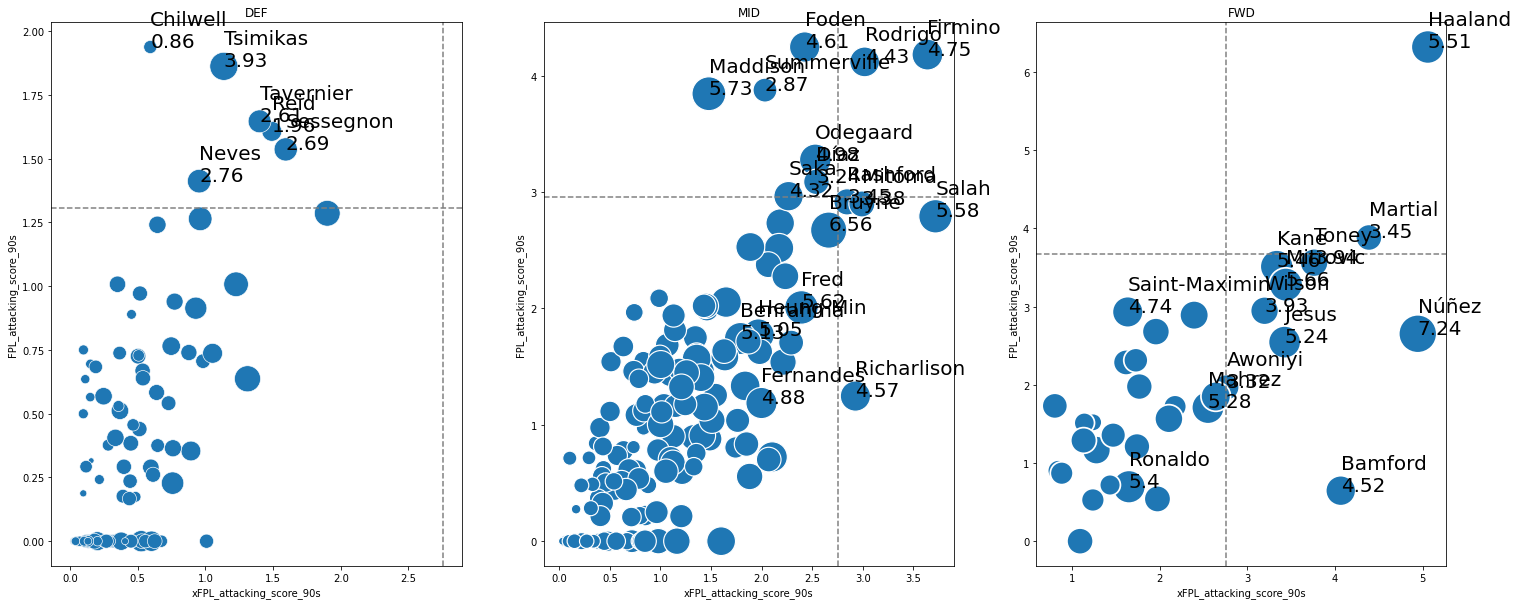

In [23]:
fig,axs = plt.subplots(1, 3, figsize = (25, 10))
x_feature = 'xFPL_attacking_score_90s'
y_feature = 'FPL_attacking_score_90s'
s_feature = 'shots_passes_90s'

print ("POS", "Player", "xFPL attacking score", "FPL attacking score", "Shots_passes")
positions = ["DEF", "MID", "FWD"]
for i, pos in enumerate(positions):
    subdata = data[data['POS']==pos]
    sns.scatterplot(x = x_feature, y = y_feature, s = 200*(subdata[s_feature]), data = subdata, ax = axs[i])
    
    t_y = subdata[y_feature].quantile(0.95)
    t_x = data[x_feature].quantile(0.95)
    t_s = data[s_feature].quantile(0.95)

    axs[i].axhline(t_y, linestyle = '--', color = 'gray')
    axs[i].axvline(t_x, linestyle = '--', color = 'gray')

    for idx, row in subdata.iterrows():
        if (row[y_feature]>t_y) or (row[x_feature]>t_x) or (row[s_feature]>t_s):
            print (pos, row['player_name'], row[x_feature], row[y_feature], row[s_feature])
            axs[i].text(row[x_feature], row[y_feature], s = str(row['player_name'].split()[-1]) + "\n" + str(round(row[s_feature],2)), fontsize = 20)

    axs[i].set_title("{}".format(pos))

plt.show()

#### Analysing top performers of each team

In [27]:
data = pd.read_csv("Players_data_stats.csv")
data.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,8260,Erling Haaland,16,1324,21,15.813955,3,3.719011,65,16,3,0,F S,Manchester City,18,13.530448,15.309691,0.955593
1,647,Harry Kane,18,1614,15,11.978790,1,3.968278,67,31,4,0,F,Tottenham,13,9.695287,11.282306,1.823113
2,998,Ivan Toney,16,1440,12,13.103710,3,2.592261,47,16,6,0,F,Brentford,9,10.820209,11.378092,2.378428
3,773,Aleksandar Mitrovic,15,1289,11,10.711971,1,2.143341,69,12,5,0,F,Fulham,8,6.906125,9.421914,2.204721
4,2381,Rodrigo,16,1158,10,6.685382,1,1.806797,46,11,2,0,F M S,Leeds,9,5.924213,6.834499,1.127569


In [52]:
len(teams)

20

In [53]:
data['90s'] = data['time']/90
data['xG_per90'] = data['xG']/data['90s']
data['xA_per90'] = data['xA']/data['90s']
data['npxG_per90'] = data['npxG']/data['90s']
data['npxG_plus_xA'] = data['npxG'] + data['xG']
data['npxG_plus_xA_per90'] = data['npxG_plus_xA']/data['90s']

In [54]:
team_stats = data[['player_name','team_title','npxG', 'xG', 'xA', 'goals','assists',
'xG_per90', 'xA_per90','npxG_per90', 'xA_per90', 'npxG_plus_xA', 'npxG_plus_xA_per90']].groupby('team_title').sum().reset_index()

In [55]:
data['xG'].sum()

515.474946743343

In [56]:
def get_team_player_contribution(team_, feature = 'npxG'):
    t = data[data['team_title']==team_]
    t_feature = t[feature].sum()

    t = t.sort_values(by = feature, ascending = False)

    players = []
    cont = []
    feature_vals = []
    cum_sum_cont = 0
    i = 0
    for idx, row in t.iterrows():
        i+=1
        players.append(row['player_name'])
        feature_vals.append(row[feature])
        cont.append(row[feature]/t_feature)
        cum_sum_cont+=cont[-1]
        if i==4:
            players.append("Others")
            cont.append(1-cum_sum_cont)
            feature_vals.append(t_feature - sum(feature_vals))
            break
    
    return (players, feature_vals, cont)

In [60]:
teams_data = pd.read_csv('teams_data_stats.csv')
teams_data.head()

,index,Team,MP,xG,npxG,xGA,npxGA,PPDA,OPPDA,DC,ODC,pts
0,9,Arsenal,17,35.623914,34.862744,14.953487,12.669970,9.902235,14.112805,189,72,44
1,12,Manchester City,17,38.988330,36.704830,14.338207,12.815864,10.764151,24.904215,229,58,39
2,10,Newcastle United,18,33.937981,31.654478,19.250641,18.489474,10.208651,11.048338,176,107,35
3,13,Manchester United,17,29.406242,28.645068,19.087049,18.325875,12.774510,14.693103,162,118,35
4,8,Tottenham,18,29.205612,26.922098,22.322946,21.561782,13.110092,15.706897,127,136,33


In [61]:
feature = "npxG"
team_stats.sort_values(by = feature, ascending = False, inplace = True)
teams_data.sort_values(by = feature, ascending = False, inplace = True)
teams = teams_data['Team'].values

players1 = [""]*len(teams)
players2 = [""]*len(teams)
players3 = [""]*len(teams)
players4 = [""]*len(teams)
players5 = [""]*len(teams)

conts1 = [""]*len(teams)
conts2 = [""]*len(teams)
conts3 = [""]*len(teams)
conts4 = [""]*len(teams)
conts5 = [""]*len(teams)

top_perfs = np.zeros((len(teams), 5))

for i, team in enumerate(teams):
    players, features, conts = get_team_player_contribution(team, feature)
    top_perfs[i,] = features
    
    if round(conts[0],3)>0:
        players1[i] = players[0]
        conts1[i] = conts[0]

    if round(conts[1],3)>0:
        players2[i] = players[1]
        conts2[i] = conts[1]

    if round(conts[2],3)>0:
        players3[i] = players[2]
        conts3[i] = conts[2]

    if round(conts[3],3)>0:
        players4[i] = players[3]
        conts4[i] = conts[3]

    if round(conts[4],3)>0:
        players5[i] = players[4]
        conts5[i] = conts[4]

In [62]:
values1 = np.round(top_perfs[:,0], 3)
values2 = np.round(top_perfs[:,1], 3)
values3 = np.round(top_perfs[:,2], 3)
values4 = np.round(top_perfs[:,3], 3)
values5 = np.round(top_perfs[:,4], 3)

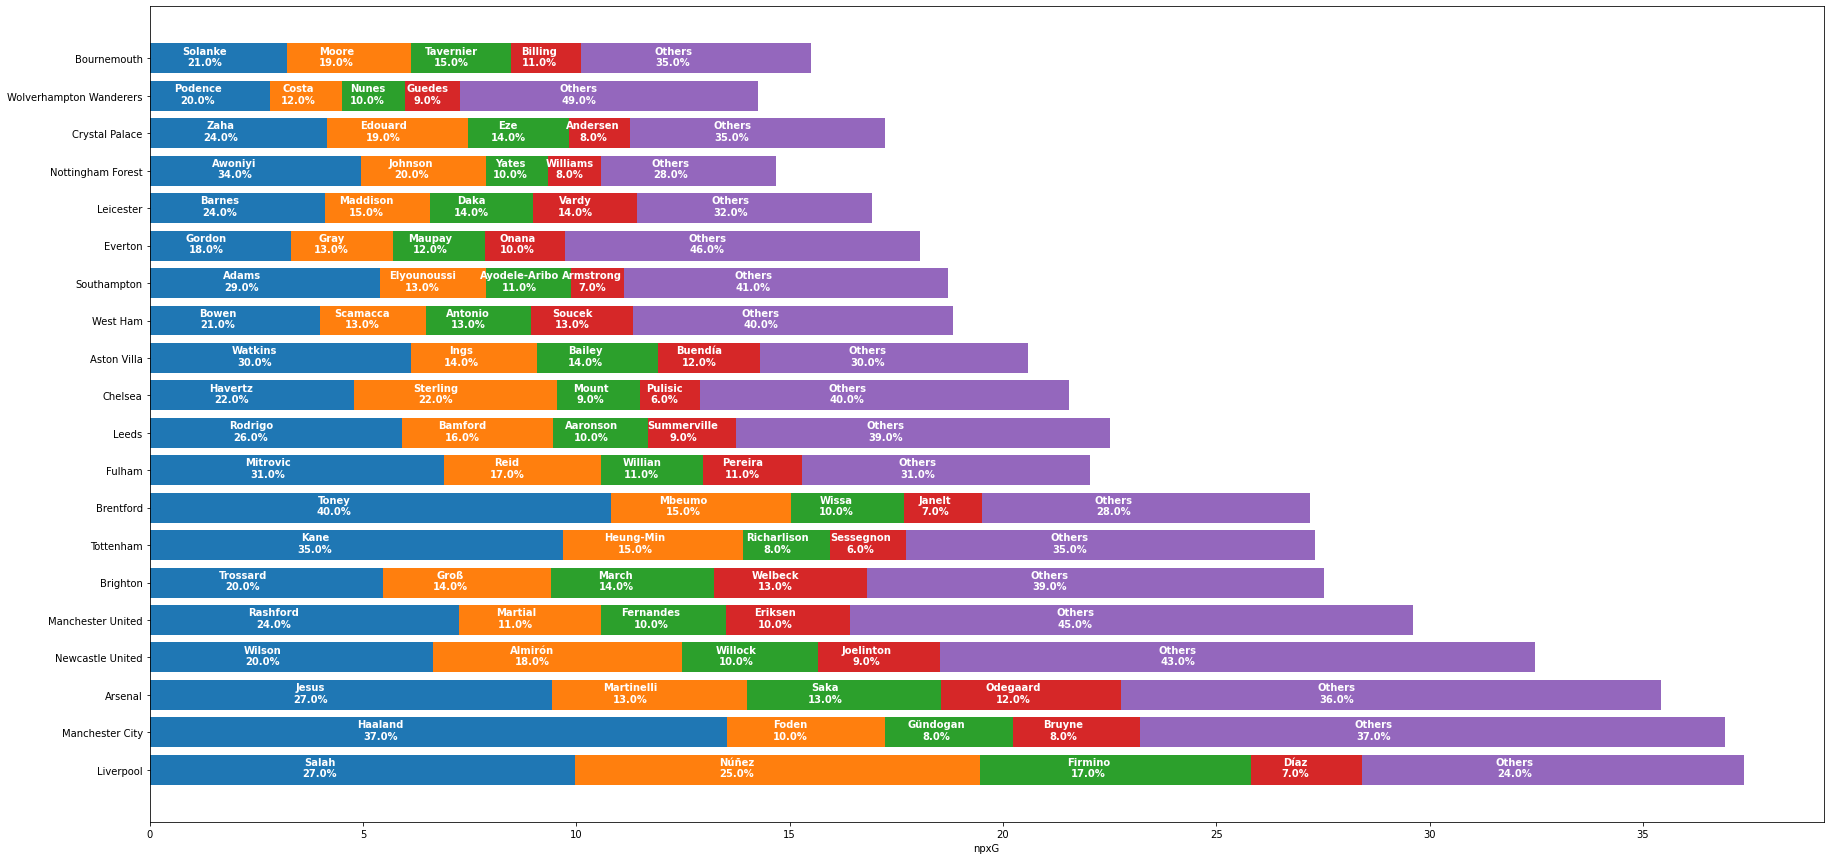

In [63]:
fig = plt.figure(figsize = (30, 15))
s = np.zeros(top_perfs.shape[0])
for i in range(5):
    if i==0:
        plt.barh(teams, top_perfs[:,i])
    else:
        plt.barh(teams, top_perfs[:,i], left = s)
    s = s+top_perfs[:,i]

y_height = 0.05
x_height = 0.4

for i, v in enumerate(values1):
    if players1[i]!="":
        text = players1[i].split()[-1] + "\n" + str(round(round(conts1[i],2)*100,0)) + "%"
    else:
        text = ""
    plt.text(v*x_height, i + y_height, text, color = "white", fontweight = "bold", fontsize = 10,
    ha = "center", va = "center")

# Use values1[i] + v * 0.45 as the x-coordinate
for i, v in enumerate(values2):
    if players2[i]!="":
        text = players2[i].split()[-1] + "\n" + str(round(round(conts2[i], 2)*100,0)) + "%"
    else:
        text = ""
    plt.text(values1[i] + v * x_height, i + y_height, text, color='white', fontweight='bold', fontsize=10, 
             ha='center', va='center')

# Use values1[i] + values2[i] + v * 0.45 as the x-coordinate

for i, v in enumerate(values3):
    if players3[i]!="":
        text = players3[i].split()[-1] + "\n" + str(round(round(conts3[i], 2)*100,0)) + "%"
    else:
        text = ""
    plt.text(values1[i] + values2[i] + v * x_height, i + y_height, text, color='white', fontweight='bold', fontsize=10, 
             ha='center', va='center')

for i, v in enumerate(values4):
    if players4[i]!="":
            text = players4[i].split()[-1] + "\n" + str(round(round(conts4[i], 2)*100,0)) + "%"
    else:
        text = ""
    plt.text(values1[i] + values2[i] + values3[i] + v * x_height, i + y_height, text, color='white', fontweight='bold', fontsize=10, 
             ha='center', va='center')

for i, v in enumerate(values5):
    if players5[i]!="":
        text = players5[i].split()[-1] + "\n" + str(round(round(conts5[i], 2)*100,0)) +"%"
    else:
        text = ""
    plt.text(values1[i] + values2[i] + values3[i] + values4[i] + v * x_height, i + y_height, text, color='white', fontweight='bold', fontsize=10, 
             ha='center', va='center')
plt.xlabel("{}".format(feature))
plt.savefig("{}_top_performers.png".format(feature))
plt.show()